In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/steam-games-dataset/games.csv
/kaggle/input/steam-games-dataset/games.json


In [2]:
os.chdir("/kaggle/input/steam-games-dataset/")
df = pd.read_csv("games.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews                     9743 non-null   object 
 12  Header image                85103 non-null  object 
 13  Website                     394

In [4]:
df.head(1)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


#### Data Cleaning

In [5]:
df['Month'] = df['Release date'].str.split(' ').str[0]
df['Year'] = df['Release date'].str.split(' ').str[-1]
df['Year'] = df['Year'].astype(int)

In [6]:
df['Estimated owners'].value_counts()

Estimated owners
0 - 20000                55285
0 - 0                    11504
20000 - 50000             7808
50000 - 100000            3886
100000 - 200000           2566
200000 - 500000           2142
500000 - 1000000           906
1000000 - 2000000          521
2000000 - 5000000          329
5000000 - 10000000          92
10000000 - 20000000         38
20000000 - 50000000         21
50000000 - 100000000         4
100000000 - 200000000        1
Name: count, dtype: int64

**Considering midpoint as owner count**

In [7]:
def get_midpoint(range_str):
    if '-' in range_str:
        low, high = range_str.split(' - ')
        return (int(low) + int(high)) / 2
    return 0

df['Estimated owners midpoint'] = df['Estimated owners'].apply(get_midpoint)

In [8]:
removed_columns=['AppID','Screenshots','Reviews','Header image', 'Website', 'Support url', 'Support email','Metacritic url','Notes','Average playtime two weeks','Median playtime two weeks','Median playtime forever','Movies','Release date']

In [9]:
df = df.drop(columns=removed_columns)

In [10]:
df.columns

Index(['Name', 'Estimated owners', 'Peak CCU', 'Required age', 'Price',
       'DLC count', 'About the game', 'Supported languages',
       'Full audio languages', 'Windows', 'Mac', 'Linux', 'Metacritic score',
       'User score', 'Positive', 'Negative', 'Score rank', 'Achievements',
       'Recommendations', 'Average playtime forever', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Month', 'Year',
       'Estimated owners midpoint'],
      dtype='object')

# Descriptive Statistics

## Basic Game Statistics:
- Total number of games in the dataset.
- Distribution of games by release year.
- Average, median, and distribution of game prices.
- Distribution of games by required age.

In [11]:
print("Total number of games in the dataset",df.shape[0])

Total number of games in the dataset 85103


In [12]:
df['Price'].describe()

count    85103.000000
mean         7.193703
std         12.362478
min          0.000000
25%          0.990000
50%          4.490000
75%          9.990000
max        999.980000
Name: Price, dtype: float64

## Trend of Game count and Average Price by Year

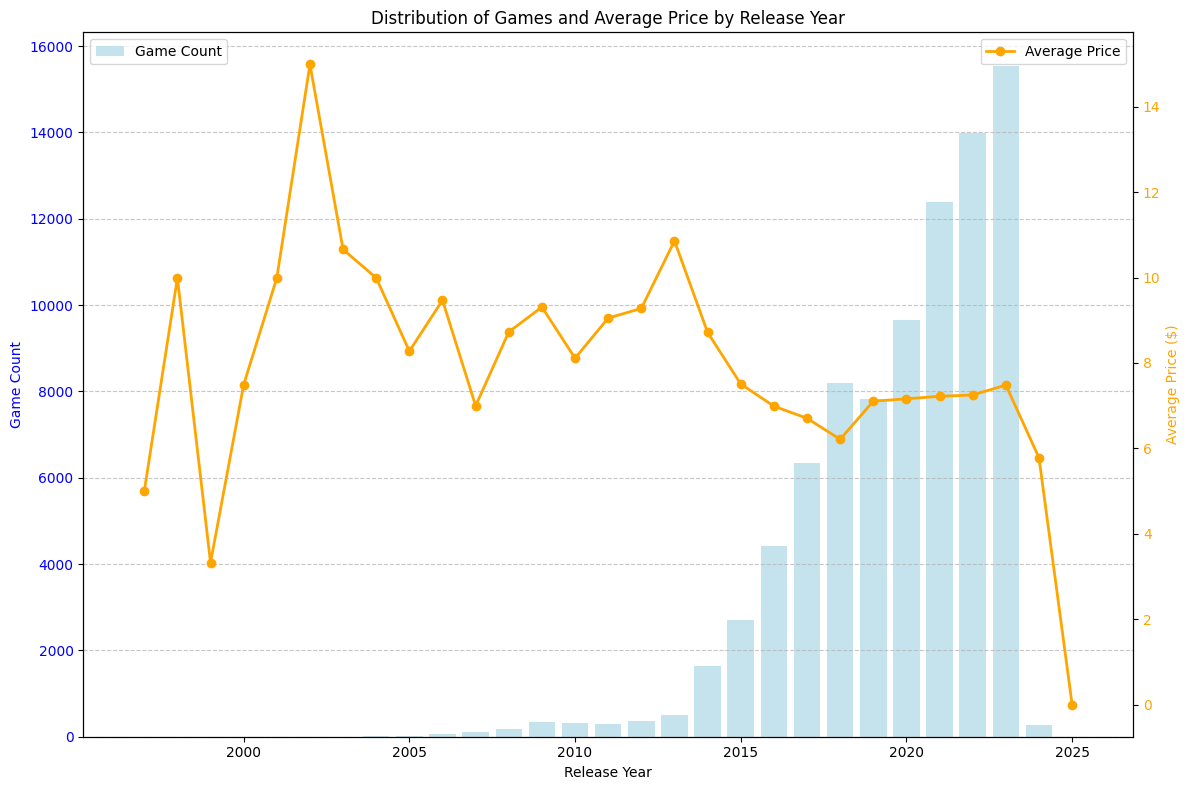

In [13]:
fig, ax1 = plt.subplots(figsize=(12, 8))
games_by_year = df.groupby('Year').size()

avg_price_by_year = df.groupby('Year')['Price'].mean()

ax1.bar(games_by_year.index, games_by_year, color='lightblue', alpha=0.7, label='Game Count')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Game Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(avg_price_by_year.index, avg_price_by_year, color='orange', marker='o', linestyle='-', linewidth=2, label='Average Price')
ax2.set_ylabel('Average Price ($)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Games and Average Price by Release Year')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [14]:
print("Game count in 2009",games_by_year[2009])
print("Game count in 2010",games_by_year[2010])
print("Game count in 2011",games_by_year[2011])
print("Game count in 2012",games_by_year[2012])

Game count in 2009 343
Game count in 2010 309
Game count in 2011 286
Game count in 2012 356


In [15]:
df[df['Year']<2003]

,Name,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,...,Recommendations,Average playtime forever,Developers,Publishers,Categories,Genres,Tags,Month,Year,Estimated owners midpoint
11743,Mafia,500000 - 1000000,91,17,14.99,0,It’s 1930. After an inadvertent brush with the...,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...",True,...,6235,270,Illusion Softworks,2K,Single-player,"Action,Adventure","Action,Classic,Story Rich,Open World,Crime,Atm...",Aug,2002,750000.0
17218,Legacy of Kain: Soul Reaver,500000 - 1000000,4,17,0.00,0,"As Raziel, stalk the shadows of Nosgoth preyin...",['English'],['English'],True,...,1423,267,Crystal Dynamics,Square Enix,Single-player,"Action,Adventure","Adventure,Action,Vampire,Classic,Story Rich,Da...",Sep,1999,750000.0
19555,Team Fortress Classic,5000000 - 10000000,110,0,4.99,0,One of the most popular online action games of...,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,...,4722,143,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",Apr,1999,7500000.0
22217,POSTAL,5000000 - 10000000,30,18,0.00,0,Take control of The Postal Dude in his infamou...,['English'],['English'],True,...,2291,215,Running With Scissors,Running With Scissors,"Single-player,Steam Achievements,Full controll...","Action,Indie","Horror,Twin Stick Shooter,Top-Down Shooter,Vil...",Nov,1997,7500000.0
23827,Geneforge 1,100000 - 200000,3,0,19.99,0,Geneforge is an Indie fantasy role-playing gam...,['English'],[],True,...,297,486,Spiderweb Software,Spiderweb Software,Single-player,"Strategy,RPG,Indie","RPG,Indie,Isometric,Strategy,Turn-Based Combat...",Dec,2001,150000.0
33814,Gothic 1,500000 - 1000000,336,0,9.99,0,War has been waged across the kingdom of Myrta...,"['English', 'German', 'Spanish - Spain', 'Poli...","['English', 'German', 'Polish']",True,...,7203,835,Piranha Bytes,THQ Nordic,Single-player,"Action,RPG","RPG,Open World,Classic,Atmospheric,Singleplaye...",Mar,2001,750000.0
34209,Deathmatch Classic,5000000 - 10000000,2,0,4.99,0,Enjoy fast-paced multiplayer gaming with Death...,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,...,1570,945,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Classic,Multiplayer,Shooter,First-P...",Jun,2001,7500000.0
34638,Ricochet,5000000 - 10000000,10,0,4.99,0,A futuristic action game that challenges your ...,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,...,3103,3978,Valve,Valve,"Multi-player,PvP,Online PvP,Valve Anti-Cheat e...",Action,"Action,FPS,Multiplayer,Classic,First-Person,Sc...",Nov,2000,7500000.0
36165,Carmageddon Max Pack,100000 - 200000,6,0,9.99,0,Carmageddon is the original freeform driving s...,['English'],['English'],True,...,384,39,Stainless Games Ltd,THQ Nordic,"Single-player,Multi-player,Steam Trading Cards","Action,Indie,Racing","Combat Racing,Racing,Action,Classic,Indie,Gore...",Jun,1997,150000.0
39055,Half-Life: Opposing Force,5000000 - 10000000,120,0,4.99,0,Return to the Black Mesa Research Facility as ...,"['English', 'French', 'German', 'Korean']",[],True,...,12374,214,Gearbox Software,Valve,"Single-player,Multi-player,Valve Anti-Cheat en...",Action,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",Nov,1999,7500000.0


### Observations
- 2023 had the highest no of games released, Considering this dataset was updated 5 months ago, according to previous year observations we can say that 2024 will have the highest games and this will go on forever, unless we again encounter something like COVID19, as we can see 2019 had a sudden drop in game releases, but can we also say that COVID did helped gaming industry to set it up for the future, large amount of people started gaming, in 2020, because of the lockdown.

- Strangely we can also see, there was a sudden drop in game release from 2010 to 2011, going from 343 in 2009 to 309 in 2010 and further 286 in 2011, but then we came back to 340+ in 2012. I think this has to do with the shift towards console gaming.

- We can ignore past Game prices hike, as those years only had like 2-3 game realeases.

- So if we look from 2014 to 2023, game prices were in same range between 6 to 7, less costly as compared to previous years.

### Distribution based on OS

In [16]:
windows_only = df[(df['Windows'] == 1) & (df['Linux'] == 0) & (df['Mac'] == 0)]
linux_only = df[(df['Windows'] == 0) & (df['Linux'] == 1) & (df['Mac'] == 0)]
mac_only = df[(df['Windows'] == 0) & (df['Linux'] == 0) & (df['Mac'] == 1)]
all_os = df[(df['Windows'] == 1) & (df['Linux'] == 1) & (df['Mac'] == 1)]

avg_price_windows = windows_only['Price'].mean()
avg_price_linux = linux_only['Price'].mean()
avg_price_mac = mac_only['Price'].mean()
avg_price_all = all_os['Price'].mean()

max_win_price = windows_only['Price'].max()
max_linux_price = linux_only['Price'].max()
max_mac_price = mac_only['Price'].max()
max_all_os = all_os['Price'].max()

print("No of Windows only Games:",windows_only.shape[0])
print("No of Linux only Games:",linux_only.shape[0])
print("No of Mac only Games:",mac_only.shape[0])
print("No of Games supported on all OS:",all_os.shape[0])
print("==================================================")
print(f"Average price of a windows only game: {avg_price_windows:.2f} USD")
print(f"Average price of a linux only game: {avg_price_linux:.2f} USD")
print(f"Average price of a mac only game: {avg_price_mac:.2f} USD")
print(f"Average price of a game supported on all os: {avg_price_all:.2f} USD")
print("==================================================")
print(f"Max price of a game on windows only: {max_win_price} USD")
print(f"Max price of a game on linux only: {max_linux_price} USD")
print(f"Max price of a game on mac only: {max_mac_price} USD")
print(f"Max price of a game on all os: {max_all_os} USD")

No of Windows only Games: 66141
No of Linux only Games: 5
No of Mac only Games: 24
No of Games supported on all OS: 8626
Average price of a windows only game: 7.08 USD
Average price of a linux only game: 8.35 USD
Average price of a mac only game: 21.41 USD
Average price of a game supported on all os: 8.29 USD
Max price of a game on windows only: 999.98 USD
Max price of a game on linux only: 29.99 USD
Max price of a game on mac only: 199.99 USD
Max price of a game on all os: 199.99 USD


In [17]:
windows_only[windows_only['Price']>999]

,Name,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,...,Recommendations,Average playtime forever,Developers,Publishers,Categories,Genres,Tags,Month,Year,Estimated owners midpoint
81901,The Leverage Game,0 - 20000,0,0,999.98,0,The Leverage Game is a board game in which pla...,"['English', 'Japanese']","['English', 'Japanese']",True,...,0,0,A&S Inc.,A&S Inc.,"Single-player,Multi-player,PvP,Online PvP","Indie,Simulation",NaN,Aug,2023,10000.0
82971,The Leverage Game Business Edition,0 - 20000,0,0,999.98,0,The Leverage Game is a board game in which pla...,"['English', 'Japanese']","['English', 'Japanese']",True,...,0,0,A&S Inc.,A&S Inc.,"Single-player,Multi-player,PvP","Indie,Simulation",NaN,Aug,2023,10000.0


In [18]:
linux_only[linux_only['Price']>29]

,Name,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,...,Recommendations,Average playtime forever,Developers,Publishers,Categories,Genres,Tags,Month,Year,Estimated owners midpoint
4612,CINEVEO - VR Cinema,20000 - 50000,0,0,29.99,0,----------------------------------------------...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Ukrainian']",False,...,0,0,Mindprobe Labs,Mindprobe Labs,"Single-player,Multi-player,Cross-Platform Mult...",Simulation,"Simulation,VR,First-Person,Multiplayer,Explora...",Apr,2015,35000.0


In [19]:
mac_only[mac_only['Price']>199]

,Name,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,...,Recommendations,Average playtime forever,Developers,Publishers,Categories,Genres,Tags,Month,Year,Estimated owners midpoint
30875,fight,0 - 20000,0,0,199.99,0,This is a shooting game. You can play with you...,['English'],['English'],False,...,0,0,rongyou,rongyou,"Multi-player,PvP,LAN PvP,Partial Controller Su...","Action,Casual","Action,Casual,e-sports,FPS,Military,Colorful,L...",Jun,2021,10000.0


In [20]:
linux_only # Checking those 5 linux only games

,Name,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,...,Recommendations,Average playtime forever,Developers,Publishers,Categories,Genres,Tags,Month,Year,Estimated owners midpoint
1981,PICNIC,0 - 20000,0,0,0.00,0,PICNIC is a 3 dimensional labyrinth game - a s...,['English'],['English'],False,...,0,0,A.D. Klumpp,A.D. Klumpp,Single-player,Indie,Indie,Mar,2018,10000.0
4612,CINEVEO - VR Cinema,20000 - 50000,0,0,29.99,0,----------------------------------------------...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Ukrainian']",False,...,0,0,Mindprobe Labs,Mindprobe Labs,"Single-player,Multi-player,Cross-Platform Mult...",Simulation,"Simulation,VR,First-Person,Multiplayer,Explora...",Apr,2015,35000.0
47644,Swinario Super Bros. Play,0 - 20000,0,0,4.99,0,Swinario super bros. This is an arcade game fo...,['Russian'],['Russian'],False,...,0,0,Maxtrigger,Maxtrigger,NaN,Adventure,NaN,Sep,2021,10000.0
75156,Mancala,0 - 20000,0,0,6.79,0,Play the international game of Mancala! Take t...,['English'],[],False,...,0,0,John Dupuy,Purple Squirrel Productions LLC,"Single-player,Multi-player,PvP,Shared/Split Sc...",Casual,NaN,Jun,2023,10000.0
77115,noname,0 - 0,0,0,0.00,0,NaN,['English'],[],False,...,0,0,NaN,NaN,"Multi-player,MMO",Free to Play,NaN,Feb,2022,0.0


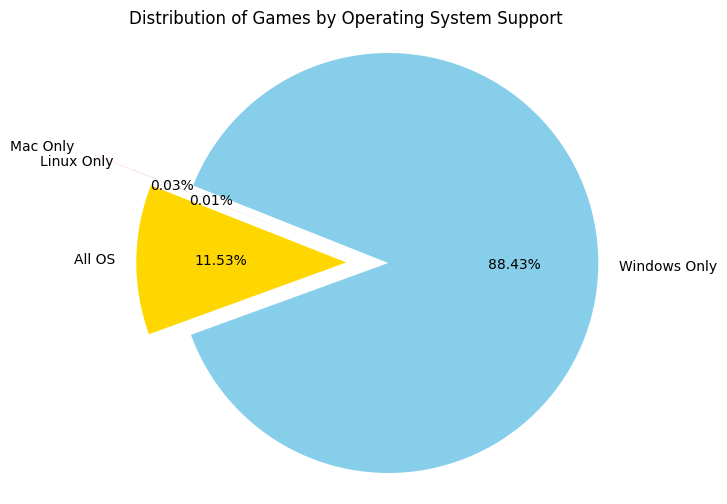

In [63]:
count_windows_only = len(windows_only)
count_linux_only = len(linux_only)
count_mac_only = len(mac_only)
count_all_os = len(all_os)

labels = ['Windows Only', 'Linux Only', 'Mac Only', 'All OS']
sizes = [count_windows_only, count_linux_only, count_mac_only, count_all_os]

colors = ['skyblue', 'green', 'pink', 'gold']
explode = (0.1, 0.2, 0.4, 0.1) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=200,explode=explode)
plt.title('Distribution of Games by Operating System Support')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Observations
- Most Costly Game on Windows - The Leverage Game. 999 USD by A&S Inc. in 2023
- No of Windows only Games: 66141
- No of Linux only Games: 5
- No of Mac only Games: 24
- No of Games supported on all OS: 8626
- Avg price on windows: 7.075193299163908
- Avg price on Linux: 8.354
- Avg price on Mac: 21.409583333333334
- Avg price on all OS: 8.28567818223974
- Max price of a game on windows only: 999.98
- Max price of a game on linux only: 29.99
- Max price of a game on mac only: 199.99
- Max price of a game on all os: 199.99

In [21]:
palette = sns.color_palette("pastel", 5)

## Analysis based on Genre

In [22]:
positive_mid=df['Positive'].median()
negative_mid=df['Negative'].median()

positive_games = df[df['Positive']>positive_mid]
negative_games = df[df['Negative']>negative_mid]

grouped_by_genres_pos = positive_games.groupby('Genres')['Positive'].sum()
grouped_by_genres_neg = negative_games.groupby('Genres')['Negative'].sum()

top_5_genres_pos = grouped_by_genres_pos.sort_values(ascending=False).head(5)
top_5_genres_neg = grouped_by_genres_neg.sort_values(ascending=False).head(5)
print("Top 5 Genres with Most Positive Reviews:\n", top_5_genres_pos)
print("\nTop 5 Genres with Most Negative Reviews:\n", top_5_genres_neg)

Top 5 Genres with Most Positive Reviews:
 Genres
Action                 10326497
Action,Free to Play     7533095
Action,Adventure        6727188
Action,RPG              3005492
RPG                     2798714
Name: Positive, dtype: int64

Top 5 Genres with Most Negative Reviews:
 Genres
Action                                                 1527141
Action,Adventure                                       1109388
Action,Free to Play                                    1057666
Action,Adventure,Free to Play,Massively Multiplayer     998398
RPG                                                     452605
Name: Negative, dtype: int64


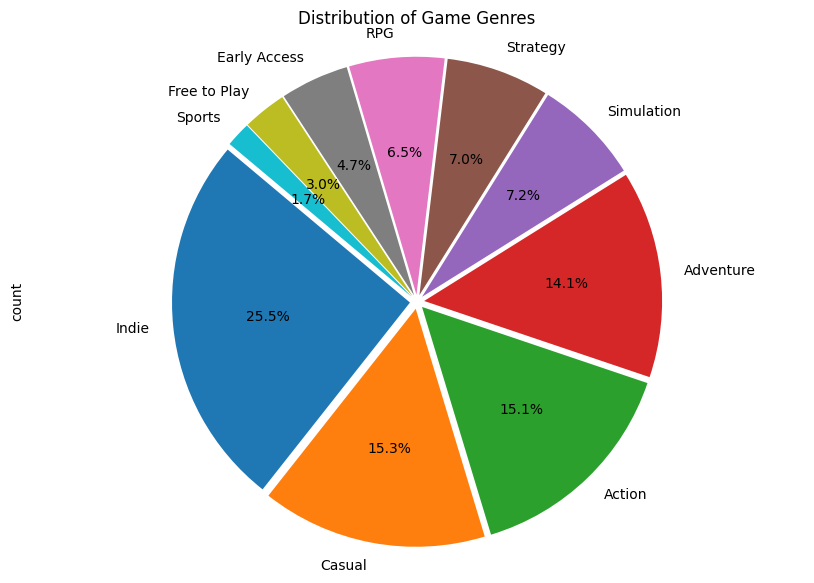

In [23]:
df['Genres'] = df['Genres'].astype(str)
# Splitting the comma-separated categories and creating a list of all categories
genres_list = df['Genres'].str.split(',', expand=True).values.flatten()
genres_list = [genre.strip() for genre in genres_list if genre]
genre_counts = pd.Series(genres_list).value_counts()
genre_counts = genre_counts.head(10)
explode = [0.03] * len(genre_counts)

plt.figure(figsize=(10, 7))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Game Genres')
plt.axis('equal')
plt.show()

## Obeservations
- The majority of games fall under the Indie category.
- Games in the Action, Adventure, and RPG genres receive the most positive and negative ratings, indicating that these genres tend to evoke strong reactions, either highly favorable or highly unfavorable.

## Analysis based on Categories

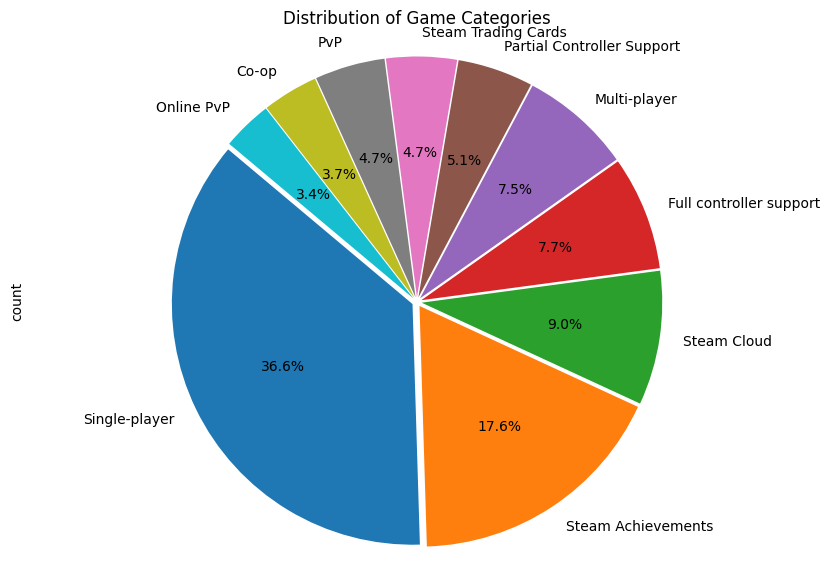

In [24]:
df['Categories'] = df['Categories'].astype(str)
categories_list = df['Categories'].str.split(',', expand=True).values.flatten()
categories_list = [category.strip() for category in categories_list if category]
category_counts = pd.Series(categories_list).value_counts()
category_counts = category_counts.head(10)
explode = [0.02] * len(category_counts)

plt.figure(figsize=(10, 7))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Game Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [25]:
category_counts

Single-player                 76424
Steam Achievements            36804
Steam Cloud                   18819
Full controller support       15993
Multi-player                  15595
Partial Controller Support    10589
Steam Trading Cards            9889
PvP                            9846
Co-op                          7817
Online PvP                     7036
Name: count, dtype: int64

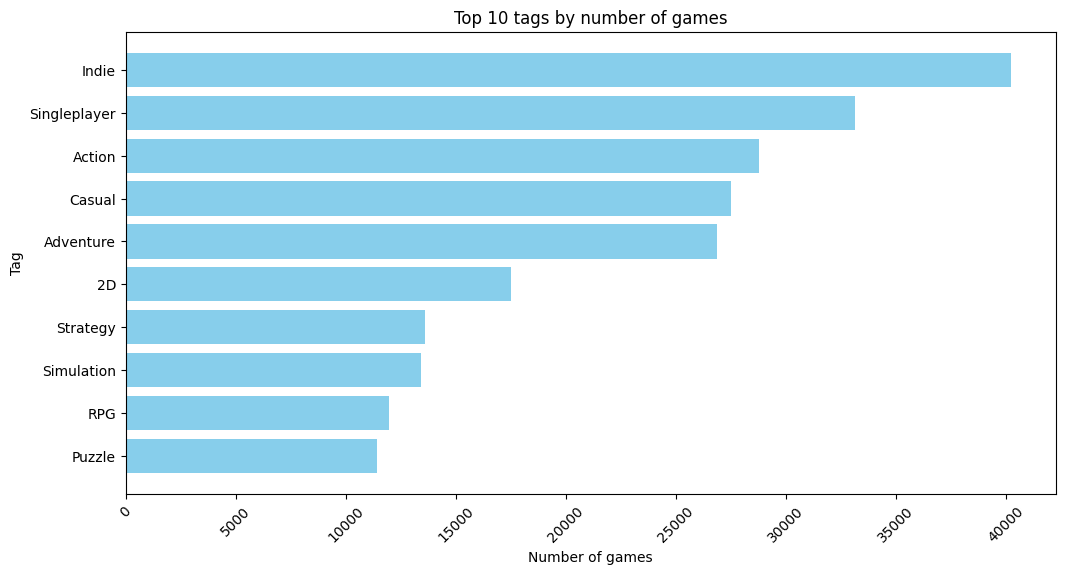

In [26]:
# Tags (top 10)
all_tags = [tag.strip() for sublist in df['Tags'].dropna() for tag in sublist.split(',') if sublist]
tag_counts = Counter(all_tags)
top_tags = pd.DataFrame(tag_counts.most_common(10), columns=['Tag', 'Number of Games'])
plt.figure(figsize=(12, 6))
plt.barh(top_tags['Tag'], top_tags['Number of Games'], color='skyblue')
plt.title('Top 10 tags by number of games')
plt.ylabel('Tag')
plt.xlabel('Number of games')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

In [27]:
top_tags

,Tag,Number of Games
0,Indie,40252
1,Singleplayer,33153
2,Action,28794
3,Casual,27509
4,Adventure,26847
5,2D,17505
6,Strategy,13616
7,Simulation,13423
8,RPG,11964
9,Puzzle,11406


## Observations
- Tags: Indie is the most common tag with 40,252 games, followed by Singleplayer (33,153 games), Action (28,794 games), Casual (27,509 games), and Adventure (26,847 games).
- Categories: Single-player is the most frequent category, present in 76,424 games.
- Additional Features: Full Controller Support is available in 15,993 games, Multi-player mode in 15,595 games, and Steam Trading Cards in 9,889 games, indicating their significant presence among games.

## Distribution based on Average Playtime in minutes 

/tmp/ipykernel_33/2126178848.py:14: UserWarning: Glyph 21103 (\N{CJK UNIFIED IDEOGRAPH-526F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_33/2126178848.py:14: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_33/2126178848.py:14: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_33/2126178848.py:14: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_33/2126178848.py:14: UserWarning: Glyph 30643 (\N{CJK UNIFIED IDEOGRAPH-77B3}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_33/2126178848.py:14: UserWarning: Glyph 25327 (\N{CJK UNIFIED IDEOGRAPH-62EF}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_33/2126178848.py:14: UserWarning: Glyph 25937 (\N{CJK UNIFIED IDEOGRAPH-6551}) missing from current font.
  plt.tight_layout()
/tmp/i

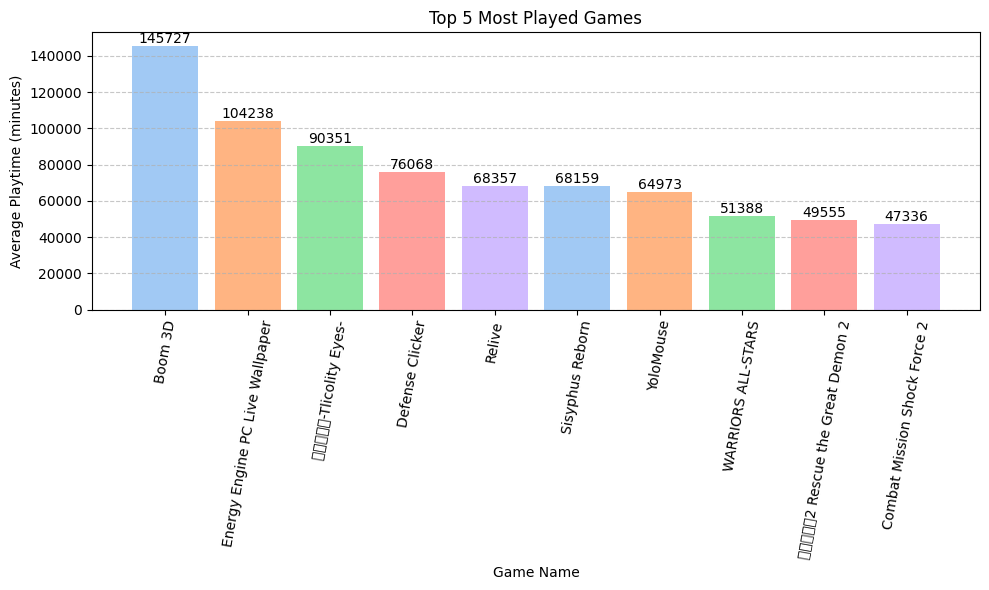

In [28]:
plt.figure(figsize=(10, 6))
sorted_df = df.sort_values(by='Average playtime forever', ascending=False)
bars = plt.bar(sorted_df['Name'].head(10), sorted_df['Average playtime forever'].head(10), color=palette)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Game Name')
plt.ylabel('Average Playtime (minutes)')
plt.title('Top 5 Most Played Games')
plt.xticks(rotation=80)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Observations
- Boom 3D is an audio enhancing application.
- 副作用之瞳-Tlicolity Eyes- Role-playing game / Free-to-play
- First 2 games are not games, but softwares.

## Analyses based on Peak Concurrent Players

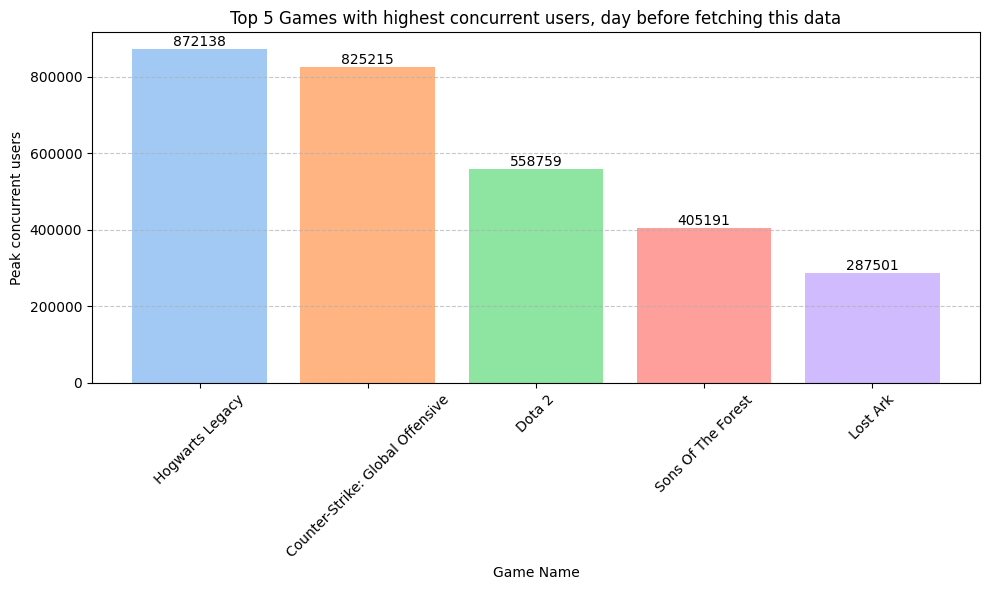

In [29]:
plt.figure(figsize=(10, 6))

sorted_df = df.sort_values(by='Peak CCU', ascending=False)

bars = plt.bar(sorted_df['Name'].head(5), sorted_df['Peak CCU'].head(5), color=palette)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Game Name')
plt.ylabel('Peak concurrent users')
plt.title('Top 5 Games with highest concurrent users, day before fetching this data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Observations
- Hogwarts Legacy gained immense popularity in 2023, with numerous Twitch and Kick streamers playing it, showcasing its widespread appeal and success.
- The following images, taken from Steam Charts, highlight key metrics of the most popular games.
[Source](https://steamcharts.com/top)
## Top Games by Current Player Count
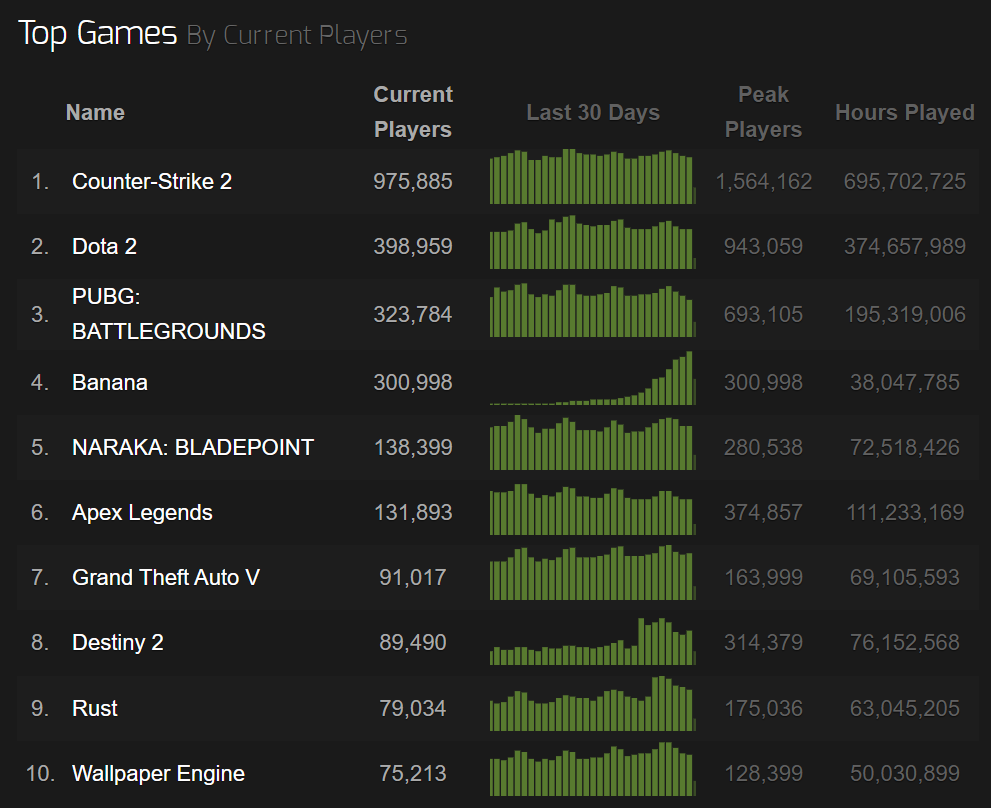

## Top Games by All-Time Peak Player Count
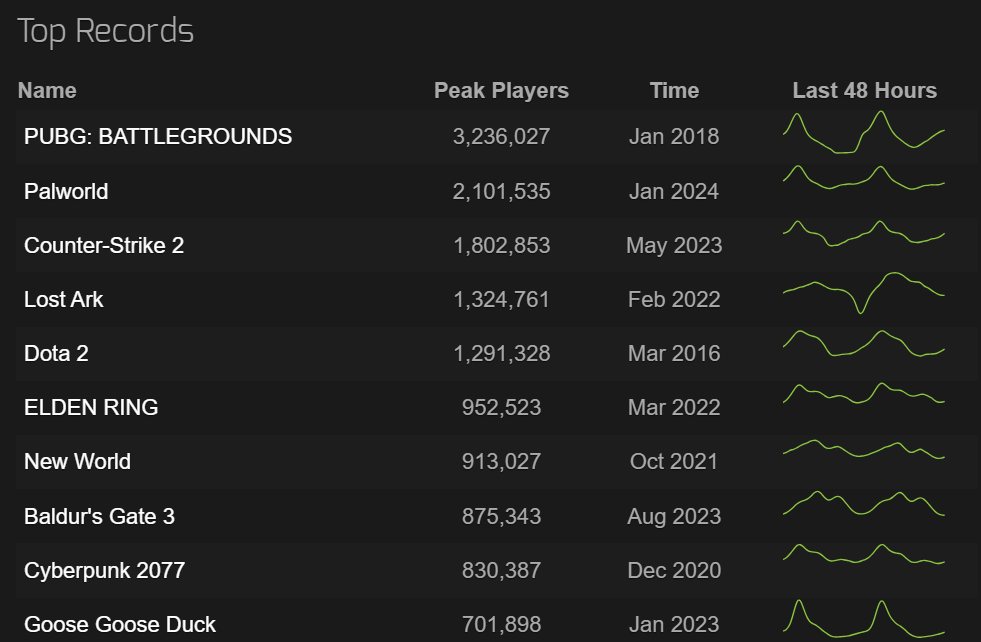



## Games with most Acheivements to Complete

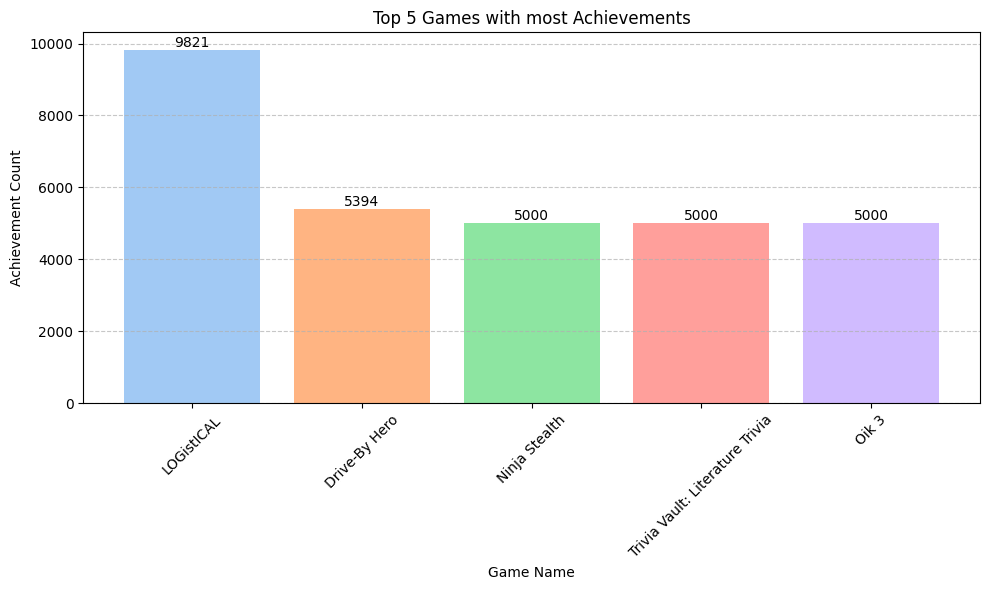

In [30]:
plt.figure(figsize=(10, 6))

sorted_df = df.sort_values(by='Achievements', ascending=False)

bars = plt.bar(sorted_df['Name'].head(5), sorted_df['Achievements'].head(5), color=palette)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Game Name')
plt.ylabel('Achievement Count')
plt.title('Top 5 Games with most Achievements')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Games with most Recommendations

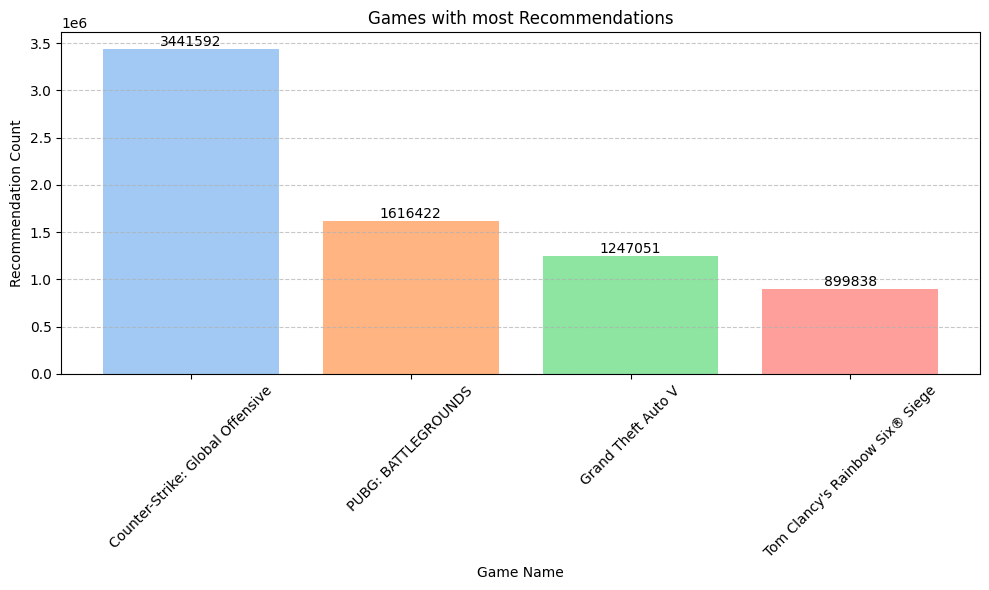

In [31]:
plt.figure(figsize=(10, 6))

sorted_df = df.sort_values(by='Recommendations', ascending=False)

bars = plt.bar(sorted_df['Name'].head(4), sorted_df['Recommendations'].head(4), color=palette)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Game Name')
plt.ylabel('Recommendation Count')
plt.title('Games with most Recommendations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
sorted_df.head(10).groupby('Name')['Recommendations'].sum().sort_values(ascending=False)

Name
Tom Clancy's Rainbow Six® Siege     4497818
Counter-Strike: Global Offensive    3441592
PUBG: BATTLEGROUNDS                 1616422
Grand Theft Auto V                  1247051
Terraria                             783469
Garry's Mod                          725462
Name: Recommendations, dtype: int64

## Observations
- Counter Strike: Global Offensive aka CSGO has the most no of recommendations.
- But if we consider Tom Clancy's Rainbow Six® Siege as a Single Game, then It has the max no of recommendations.

## Analysis based on Positive and Negative Ratings

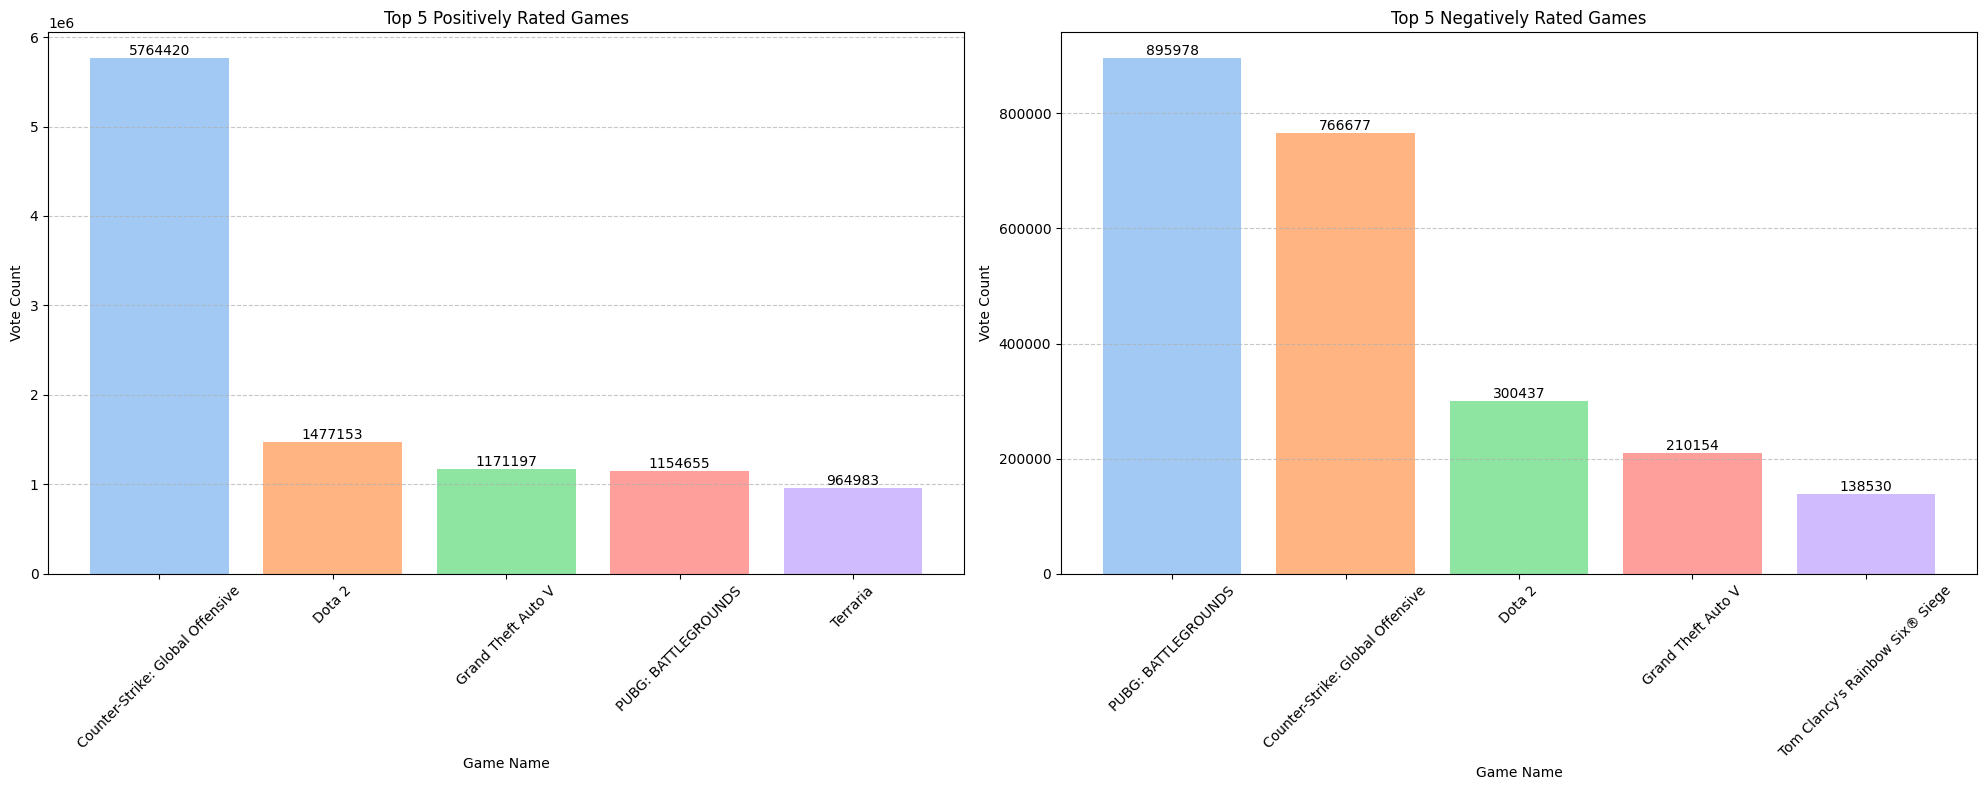

In [33]:
plt.figure(figsize=(20, 8))

# Positive 

plt.subplot(1, 2, 1) 
sorted_df_positive = df.sort_values(by='Positive', ascending=False)
bars_positive = plt.bar(sorted_df_positive['Name'].head(5), sorted_df_positive['Positive'].head(5), color=palette)
for bar in bars_positive:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xlabel('Game Name')
plt.ylabel('Vote Count')
plt.title('Top 5 Positively Rated Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Negative

plt.subplot(1, 2, 2)  
sorted_df_negative = df.sort_values(by='Negative', ascending=False)
bars_negative = plt.bar(sorted_df_negative['Name'].head(5), sorted_df_negative['Negative'].head(5), color=palette)
for bar in bars_negative:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xlabel('Game Name')
plt.ylabel('Vote Count')
plt.title('Top 5 Negatively Rated Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Observations
- CSGO dominates with the highest positive votes, while also holding the second highest negative votes, just behind PUBG.

## Analysis based on Most sold Copies and Most Downloadeded Games 

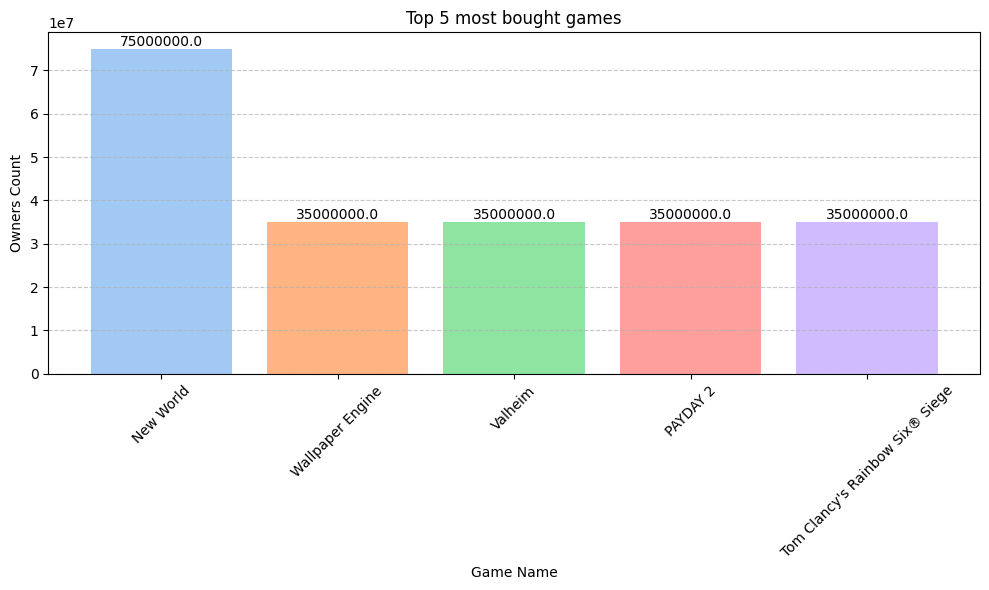

In [34]:
# Plotting the top 5 most played games
plt.figure(figsize=(10, 6))

sorted_df = df[df['Price']>0].sort_values(by='Estimated owners midpoint', ascending=False)

# Plot the bar chart
bars = plt.bar(sorted_df['Name'].head(5), sorted_df['Estimated owners midpoint'].head(5), color=palette)

# Label the bars with the corresponding playtime
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.xlabel('Game Name')
plt.ylabel('Owners Count')
plt.title('Top 5 most bought games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

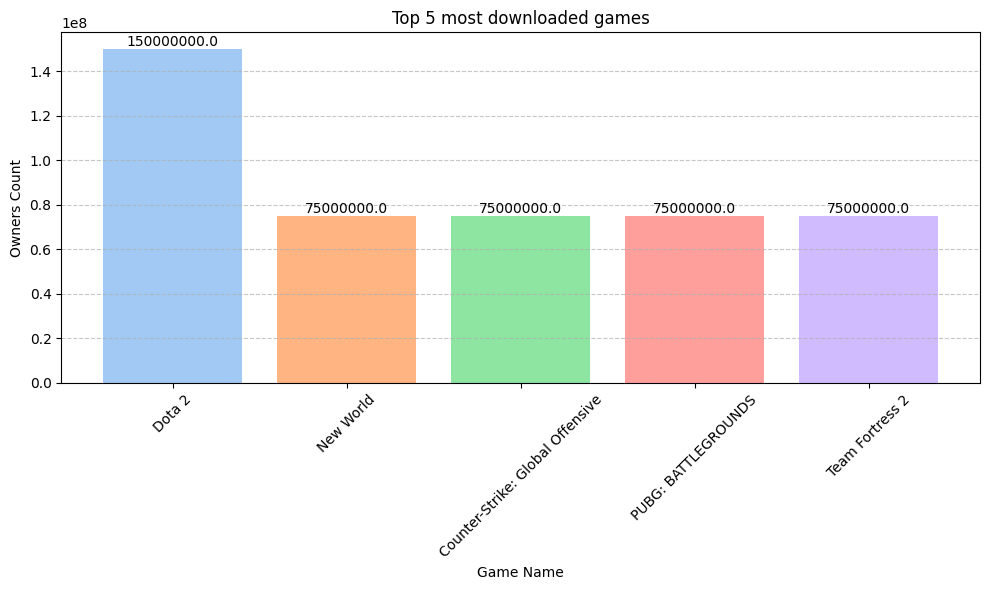

In [35]:
# Plotting the top 5 most played games
plt.figure(figsize=(10, 6))

sorted_df = df.sort_values(by='Estimated owners midpoint', ascending=False)

bars = plt.bar(sorted_df['Name'].head(),sorted_df['Estimated owners midpoint'].head(),color=palette)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Game Name')
plt.ylabel('Owners Count')
plt.title('Top 5 most downloaded games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Observations
**Note: midpoint was considered for representing estimated owner count, that's why we see others having same owner count**
- Dota 2 is the most downloaded game on Steam, it is a Free to play.
- New World is the most sold game on Steam, developed by Amazon Games, although apparently people hate it.
[Source](https://store.steampowered.com/app/1063730/New_World/)
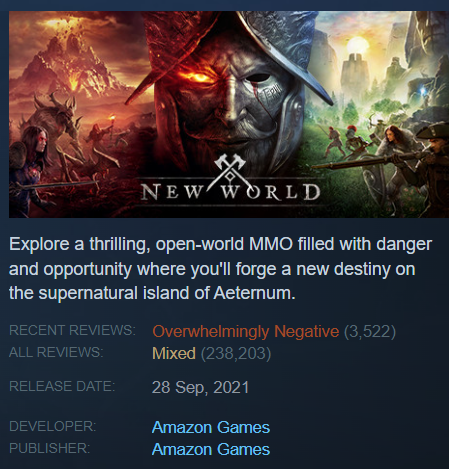

## Analysis of Positive and Negative Ratings over the years

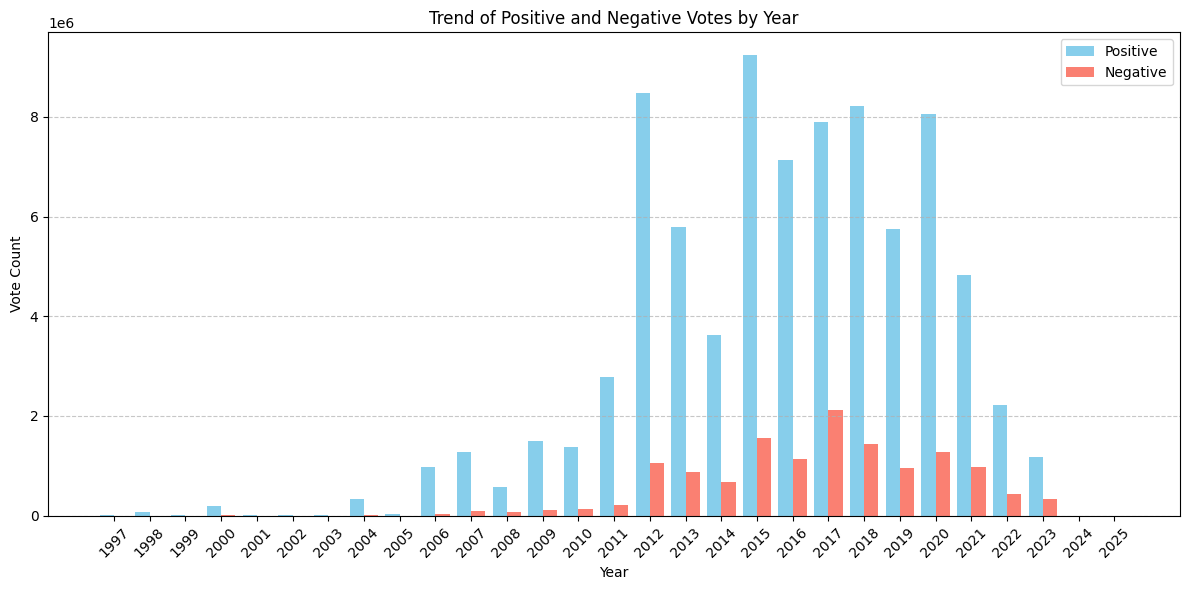

In [36]:
# Group by 'Year' and calculate the sum of 'Positive' and 'Negative' votes
votes_by_year = df.groupby('Year')[['Positive', 'Negative']].sum()
plt.figure(figsize=(12, 6))
plt.bar(votes_by_year.index - 0.2, votes_by_year['Positive'], width=0.4, label='Positive', color='skyblue')
plt.bar(votes_by_year.index + 0.2, votes_by_year['Negative'], width=0.4, label='Negative', color='salmon')

plt.xlabel('Year')
plt.ylabel('Vote Count')
plt.title('Trend of Positive and Negative Votes by Year')
plt.xticks(votes_by_year.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis based on Developers

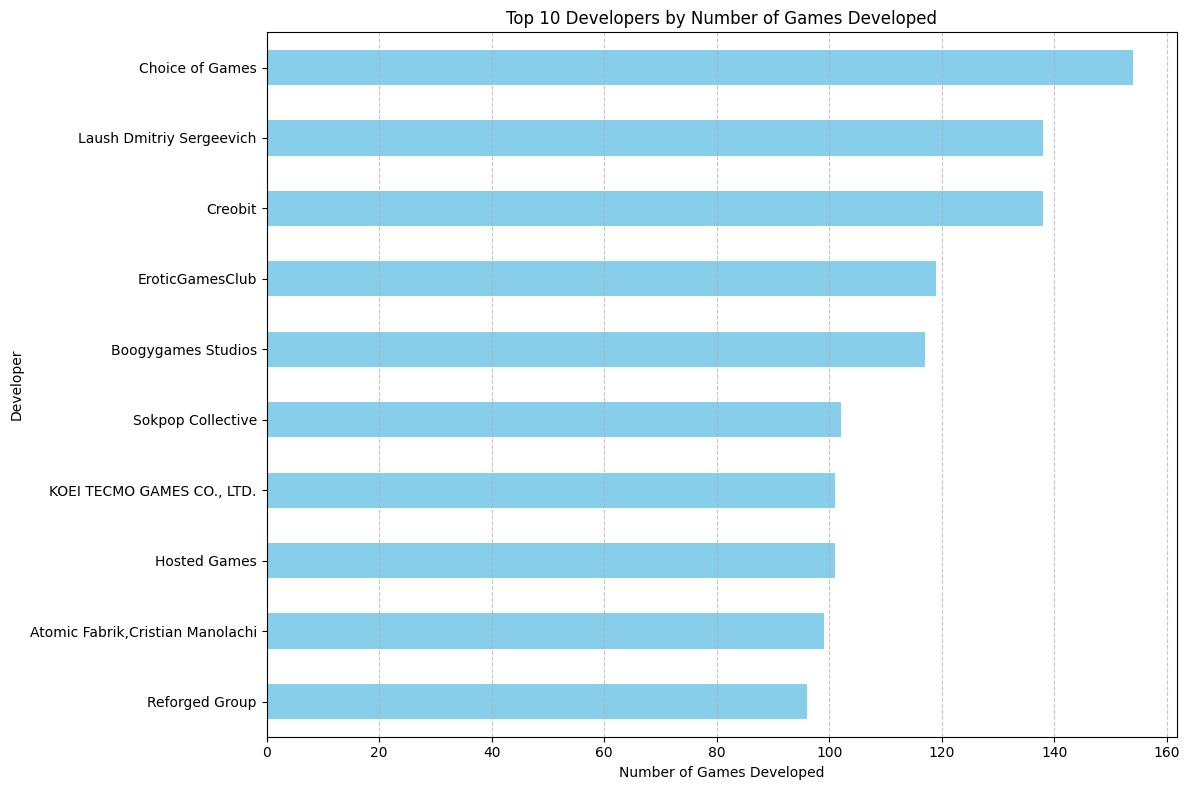

In [37]:
developer_counts = df['Developers'].value_counts()

developer_counts = developer_counts.sort_values(ascending=False)

top_10_developers = developer_counts.head(10)

plt.figure(figsize=(12, 8))
top_10_developers.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Games Developed')
plt.ylabel('Developer')
plt.title('Top 10 Developers by Number of Games Developed')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

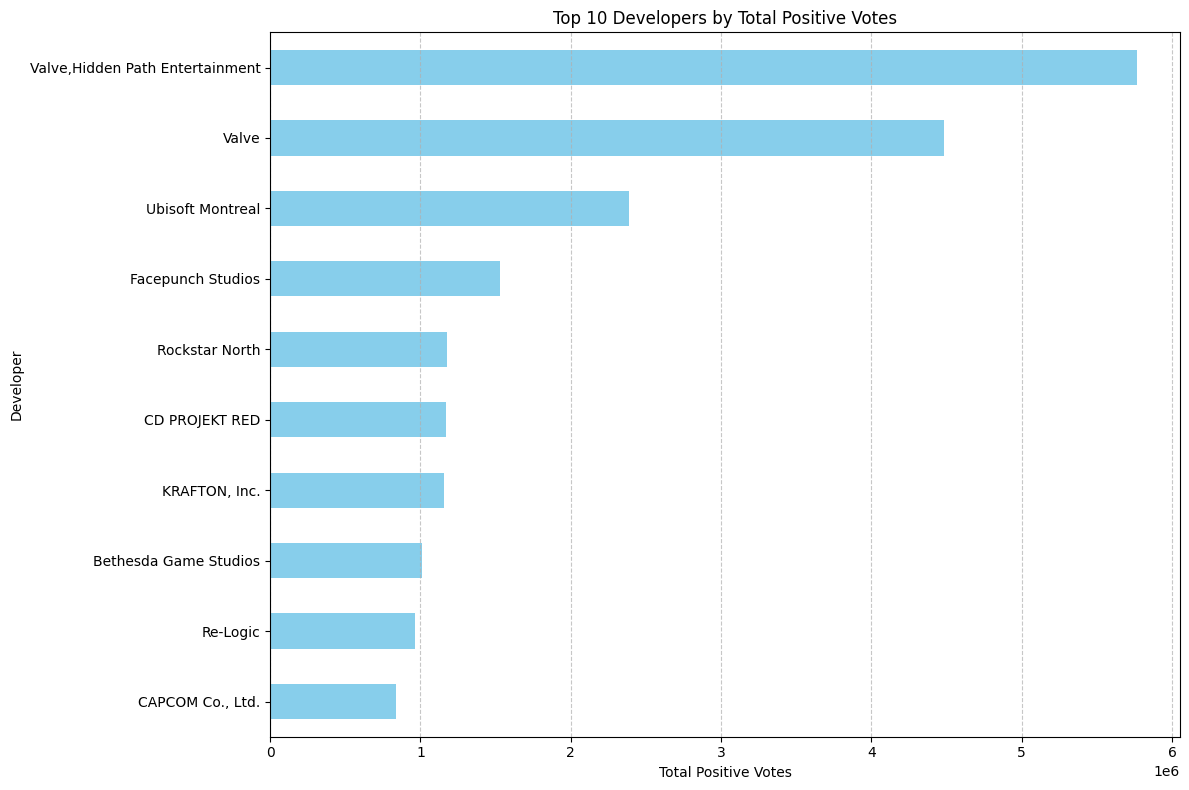

In [38]:
developer_positive_votes = df.groupby('Developers')['Positive'].sum()
developer_positive_votes = developer_positive_votes.sort_values(ascending=False)
top_10_developers_positive = developer_positive_votes.head(10)
plt.figure(figsize=(12, 8))
top_10_developers_positive.plot(kind='barh', color='skyblue')
plt.xlabel('Total Positive Votes')
plt.ylabel('Developer')
plt.title('Top 10 Developers by Total Positive Votes')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
developer_positive_votes.head(10)
developer_counts.head(10)

Developers
Choice of Games                     154
Laush Dmitriy Sergeevich            138
Creobit                             138
EroticGamesClub                     119
Boogygames Studios                  117
Sokpop Collective                   102
KOEI TECMO GAMES CO., LTD.          101
Hosted Games                        101
Atomic Fabrik,Cristian Manolachi     99
Reforged Group                       96
Name: count, dtype: int64

In [40]:
df[df['Developers']=='Valve,Hidden Path Entertainment']

,Name,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Windows,...,Recommendations,Average playtime forever,Developers,Publishers,Categories,Genres,Tags,Month,Year,Estimated owners midpoint
46158,Counter-Strike: Global Offensive,50000000 - 100000000,825215,0,0.0,1,Counter-Strike: Global Offensive (CS: GO) expa...,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']",True,...,3441592,30484,"Valve,Hidden Path Entertainment",Valve,"Multi-player,Steam Achievements,Full controlle...","Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...",Aug,2012,75000000.0


## Observations

### In terms of Games Developed

- Choice of Games: Leading with 154 games developed, Choice of Games demonstrates a prolific output, likely catering to a niche audience with a large volume of titles.

- Laush Dmitriy Sergeevich and Creobit: Both developers have an impressive 138 games each, indicating a consistent and high level of production.

### In terms of Positive Votes

- Valve and Hidden Path Entertainment: The developer collaboration of Valve and Hidden Path Entertainment leads with 5,764,420 positive votes, The Game is Counter-Strike: Global Offensive. Following closely, Valve on its own garners 4,485,026 positive votes, showcasing its strong reputation and consistent delivery of well-received games.